--- Data Info & Initial Check ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               10000 non-null  object 
 1   age                   10000 non-null  int64  
 2   country               10000 non-null  object 
 3   plan_type             10000 non-null  object 
 4   subscription_date     10000 non-null  object 
 5   tenure_months         10000 non-null  int64  
 6   watch_hours_per_week  10000 non-null  float64
 7   churn                 10000 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 625.1+ KB

Generating plot: Churn vs. Tenure...


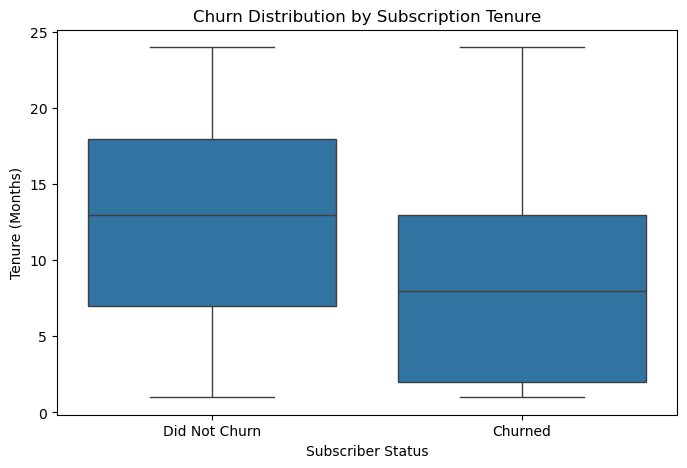


Generating plot: Churn vs. Watch Hours...


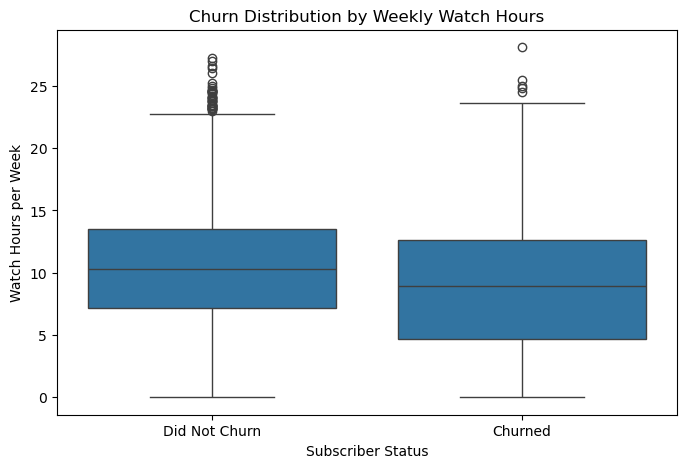


--- Preview of Final Prepared Data ---
   tenure_months  watch_hours_per_week  churn  country_Malaysia  \
0             17                   6.5      0             False   
1             22                  12.0      0             False   
2              3                  15.6      0             False   
3             14                   8.1      0             False   
4              9                  11.4      1              True   

   country_Philippines  country_Singapore  country_Thailand  country_Vietnam  \
0                False               True             False            False   
1                False              False              True            False   
2                False               True             False            False   
3                False               True             False            False   
4                False              False             False            False   

   plan_type_Premium  plan_type_Standard  age_group_26-35  age_group_36-50  

In [2]:
# --- 1. Import Necessary Libraries ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 2. Load and Inspect the Data ---
# Load the dataset you just fixed in Excel
df = pd.read_csv('disney_plus_sea_subscribers.csv')

print("--- Data Info & Initial Check ---")
# Display data types and non-null counts
df.info()

# --- 3. Exploratory Data Analysis (EDA) ---
# We'll create visualizations to understand the data's patterns.

# A. Churn vs. Tenure: We expect churners (1) to have lower tenure.
print("\nGenerating plot: Churn vs. Tenure...")
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='tenure_months', data=df)
plt.title('Churn Distribution by Subscription Tenure')
plt.xticks([0, 1], ['Did Not Churn', 'Churned'])
plt.xlabel('Subscriber Status')
plt.ylabel('Tenure (Months)')
plt.show()

# B. Churn vs. Watch Hours: We expect churners (1) to watch less.
print("\nGenerating plot: Churn vs. Watch Hours...")
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='watch_hours_per_week', data=df)
plt.title('Churn Distribution by Weekly Watch Hours')
plt.xticks([0, 1], ['Did Not Churn', 'Churned'])
plt.xlabel('Subscriber Status')
plt.ylabel('Watch Hours per Week')
plt.show()

# --- 4. Feature Engineering & Transformation ---
# The goal is to convert our data into a fully numerical format for the model.

# A. Create 'age_group' feature
# This helps the model find patterns in age brackets.
bins = [17, 25, 35, 50, 66]
labels = ['18-25', '26-35', '36-50', '51+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# B. One-Hot Encode Categorical Features
# This converts text columns like 'country' and 'plan_type' into numerical (0/1) columns.
df_prepared = pd.get_dummies(df, columns=['country', 'plan_type', 'age_group'], drop_first=True)

# C. Drop Unnecessary Columns
# The model doesn't need user_id, the original subscription date, or the original age column.
df_prepared = df_prepared.drop(['user_id', 'subscription_date', 'age'], axis=1)

# --- 5. Final Review and Export ---
print("\n--- Preview of Final Prepared Data ---")
print(df_prepared.head())

# Save the final prepared data to a new CSV file.
df_prepared.to_csv('disney_plus_prepared_for_modeling.csv', index=False)
print("\nSuccessfully created 'disney_plus_prepared_for_modeling.csv'")